### 精准率和召回率曲线（PR曲线）

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
# 如果不用copy，则y和digits指向同一个引用，修改y则会修改digits
y = digits.target.copy()

# 模拟数据倾斜，只关注数字为9的数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [5]:
decision_scores = log_reg.decision_function(X_test)

In [6]:
from sklearn.metrics import precision_score, recall_score

precisions = []
recalls = []
# 步长为0.1
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype=int)
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

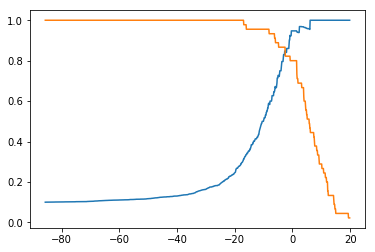

In [8]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### Precison-Recall曲线

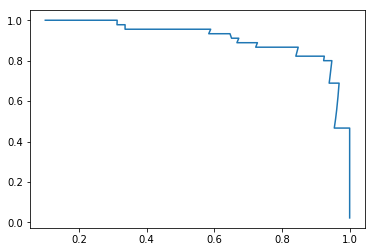

In [9]:
plt.plot(precisions, recalls)
plt.show()

### scikit-learn中的 Precison-Recall曲线

In [10]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [11]:
precisions.shape

(145,)

In [12]:
recalls.shape

(145,)

In [13]:
# 少了一个，是最大值
thresholds.shape

(144,)

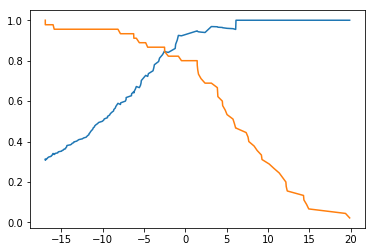

In [14]:
plt.plot(thresholds, precisions[: -1])
plt.plot(thresholds, recalls[: -1])
plt.show()

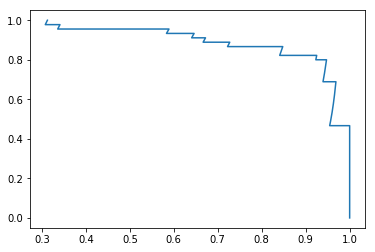

In [15]:
plt.plot(precisions, recalls)
plt.show()